In [4]:
%matplotlib inline
# import some dependencies
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set()
except ImportError:
    pass

import torch
from torch.autograd import Variable

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

torch.manual_seed(101)

In [109]:
x = [
    2,2,4,6,4,5,2,3,1,2,0,4,3,3,3,3,4,2,7,2,4,3,3,3,4,
    3,7,5,3,1,7,6,4,6,5,2,4,7,2,2,6,2,4,5,4,5,1,3,2,3,
]
data = np.array(x)

In [117]:
for i in range(0, 8, 1):
    print("{}: {}".format(i, x.count(i)))

0: 1
1: 3
2: 11
3: 12
4: 10
5: 5
6: 4
7: 4


In [106]:
data.min(), data.mean(), data.max()

(0, 3.56, 7)

In [123]:
print("var: {}".format(data.var()))
print("std: {}".format(data.std()))

var: 2.9264000000000006
std: 1.710672382427448


In [132]:
lam = Variable(torch.Tensor([3.56]))

Variable containing:
 2
[torch.FloatTensor of size 1]

In [136]:
dist.poisson.sample(lam=lam)

Variable containing:
 7
[torch.FloatTensor of size 1]

In [182]:
pdfs = []
for i in range(0, 11, 1):
    x = Variable(torch.Tensor([i]))
    pdf = np.exp(dist.poisson.log_pdf(x, lam).data[0])
    pdfs.append(pdf)
    print("y {}: {}".format(i, pdf))

y 0: 0.028438826341467157
y 1: 0.10124220409777875
y 2: 0.1802110914842489
y 3: 0.21385050463206587
y 4: 0.190326960542127
y 5: 0.13551267124296018
y 6: 0.080404226659841
y 7: 0.04089130206204762
y 8: 0.018196595767462773
y 9: 0.007197781882608546
y 10: 0.0025624116536324963


In [184]:
sum(pdfs)

0.9988345763662403

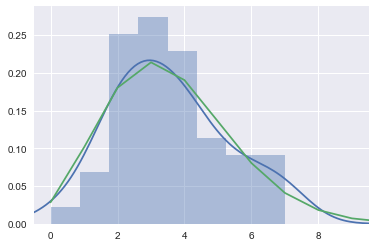

In [185]:
ax = sns.distplot(data, bins=8)
ax.set_xlim(-0.5, 9.5)
plt.plot(pdfs)

In [208]:
for lam in [2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]:
    log_pdfs = []
    for i in data:
        lamd = Variable(torch.Tensor([lam]))
        x = Variable(torch.Tensor([float(i)]))
        log_pdf = dist.poisson.log_pdf(x, lamd).data[0]
        log_pdfs.append(log_pdf)
    print("lam {}: log_pdfs {}".format(lam, sum(log_pdfs)))

lam 2.0: log_pdfs -121.88119220733643
lam 2.4: log_pdfs -109.42794859409332
lam 2.8: log_pdfs -101.98912644386292
lam 3.2: log_pdfs -98.22055196762085
lam 3.6: log_pdfs -97.25515747070312
lam 4.0: log_pdfs -98.5009937286377
lam 4.4: log_pdfs -101.53578090667725
lam 4.8: log_pdfs -106.04776763916016
lam 5.2: log_pdfs -111.80014872550964


In [190]:
sum(log_pdfs)

-121.88119220733643

In [39]:
data = Variable(torch.Tensor([[1],[2],[3],[4],[5],[6],[7],[8]]))

In [40]:
data

Variable containing:
    1
    2
    3
    4
    5
    6
    7
    8
[torch.FloatTensor of size 8x1]

In [44]:
data.shape

torch.Size([8, 1])

In [70]:
# MAP
# def model():
#     mu = pyro.sample("mu", dist.normal, Variable(torch.zeros(1)), Variable(torch.ones(1)))
#     return pyro.sample("x", dist.normal, mu, Variable(torch.ones(1)))

# def guide():
#     mu_param = pyro.param("mu_param", Variable(torch.randn(1), requires_grad=True))
#     return pyro.sample("mu", dist.delta, mu_param)

# maximum likelihood
def model():
    mu = pyro.param("mu", Variable(torch.randn(1), requires_grad=True))
    return pyro.sample("x", dist.normal, mu, Variable(torch.ones(1)))

def guide():
    return None

# use pyro.condition to constrain model sample site "x" to be equal to some fixed observed data
# conditioned_model = pyro.condition(model, data={"x": data})

# svi = pyro.infer.SVI(model=conditioned_model,
#                      guide=guide,
#                      optim=pyro.optim.SGD({"lr": 0.001}),
#                      loss="ELBO")

# losses = []
# for t in range(1000):
#     # svi.step is called with whatever arguments model and guide take - in this case, nothing
#     losses.append(svi.step())

# # to get the value of mu, just call guide
# mu_final = guide()

In [71]:
mu_final

In [72]:
model()

Variable containing:
 5.2739
[torch.FloatTensor of size 1]